In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
batting = pd.read_csv('batting.csv',encoding = "ISO-8859-1")
bowling = pd.read_csv('bowling.csv',encoding = "ISO-8859-1")
batting_position_data = pd.read_csv('openers.csv',encoding = "ISO-8859-1")
all_data = batting.join(bowling.set_index('Player'), on='Player',how='left', lsuffix='_left', rsuffix='_right')
all_data = all_data.fillna(0)
batting_position_data['Runs'] = pd.to_numeric(batting_position_data['Runs'])
batting_position_data['BF'] = pd.to_numeric(batting_position_data['BF'])
#(all_data.head())
#(batting_position_data.head())

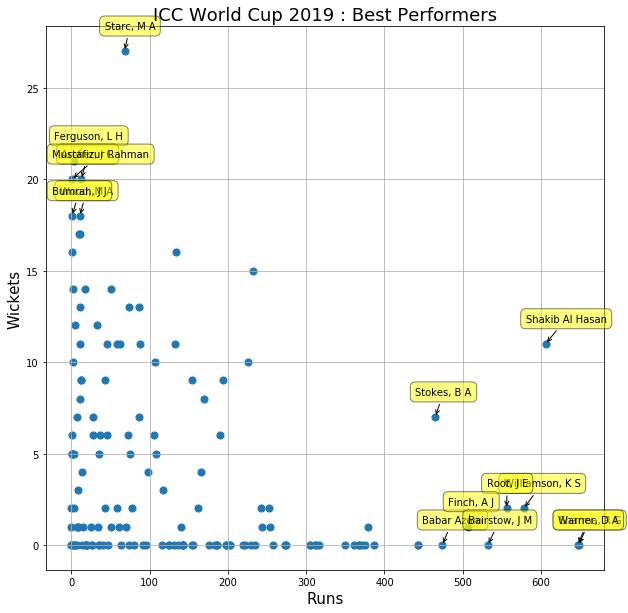

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.grid()
#plt.figure(figsize=(8,8))
#plt.style.use('ggplot')
plt.scatter(x = 'Runs', y = 'W', data = all_data,s=50, marker = 'o')
all_data_annotation = all_data[(all_data['Runs'] > 450) | (all_data['W'] > 17)]
plt.title('ICC World Cup 2019 : Best Performers', fontsize = 18)
plt.xlabel('Runs', fontsize = 15)
plt.ylabel('Wickets', fontsize = 15)
for label, x, y in zip(all_data_annotation['Player'], all_data_annotation['Runs'], all_data_annotation['W']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset pixels', ha='left', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

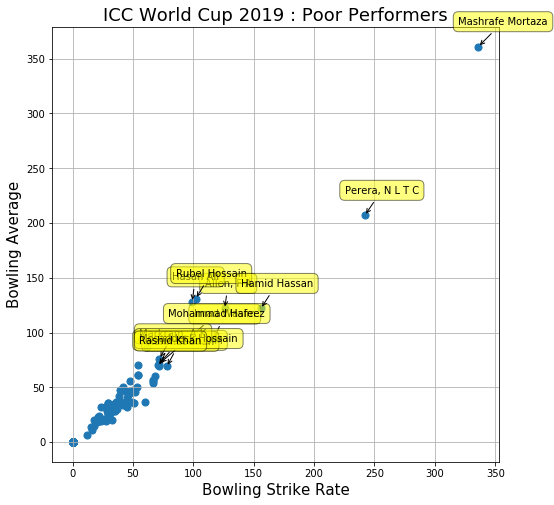

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.grid()
#plt.figure(figsize=(8,8))
#plt.style.use('ggplot')
plt.scatter(x = 'Bowling_Sr', y = 'Bowling_avg', data = all_data,s=50, marker = 'o')
poor_bolwers = all_data[(all_data['Bowling_Sr'] > 70) & (all_data['O'] > 5) & (all_data['Bowling_Sr'] !=0)]
plt.title('ICC World Cup 2019 : Poor Performers',fontsize = 18)
plt.xlabel('Bowling Strike Rate',fontsize=15)
plt.ylabel('Bowling Average',fontsize=15)

for label, x, y in zip(poor_bolwers['Player'], poor_bolwers['Bowling_Sr'], poor_bolwers['Bowling_avg']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset pixels', ha='left', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0,0.5,'Country')

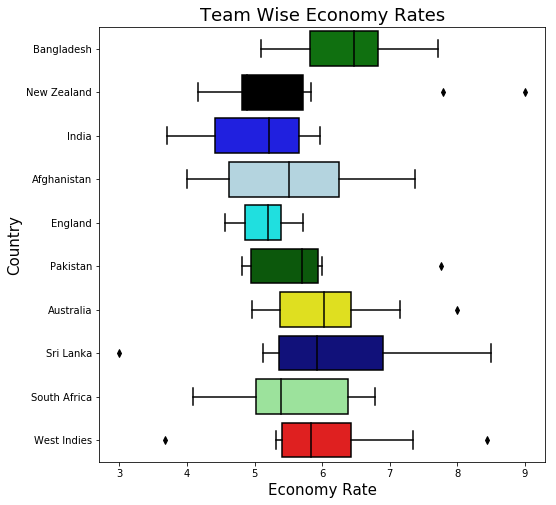

In [15]:
plt.figure(figsize =(8,8))
my_pal = {"New Zealand": "black","Bangladesh": "green","England": "cyan","Australia": "yellow",
          "Pakistan": "darkgreen","Sri Lanka": "darkblue","India": "blue", "West Indies": "red", 
          "South Africa":"lightgreen", "Afghanistan":"lightblue"}
sns.boxplot(x="E/R", y="Country_left",palette=my_pal,data=all_data[(all_data['E/R'] > 0)])
plt.title('Team Wise Economy Rates', fontsize= 18)
plt.xlabel('Economy Rate', fontsize= 15)
plt.ylabel('Country', fontsize= 15)

In [16]:
position_wise_runs = batting_position_data.groupby(('Country','position'))[['Runs','BF']].agg('sum')
position_wise_runs = position_wise_runs / position_wise_runs.groupby(level=0).sum()
position_wise_runs = position_wise_runs.unstack()
#a.info()
position_wise_runs
position_wise_runs = position_wise_runs.sort_values(by = ('Runs', '1 to 3'))

C:\Users\sabar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


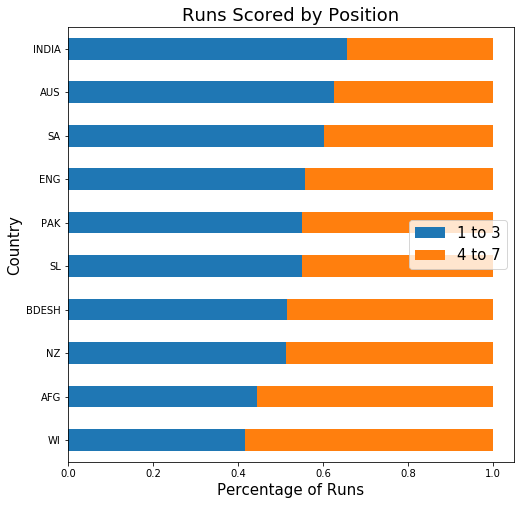

In [17]:
position_wise_runs['Runs'].plot(kind='barh', stacked=True, figsize = (8,8))
plt.title('Runs Scored by Position', fontsize = 18)
plt.xlabel('Percentage of Runs', fontsize = 15)
plt.ylabel('Country', fontsize = 15)
plt.legend(loc = 'right', fontsize = 15)

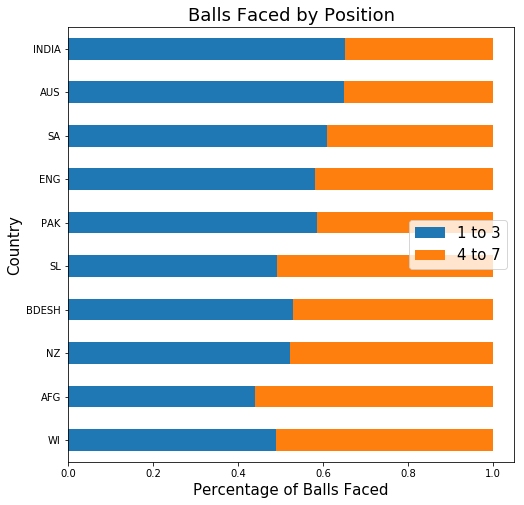

In [18]:
position_wise_runs['BF'].plot(kind='barh', stacked=True, figsize = (8,8))
plt.title('Balls Faced by Position', fontsize = 18)
plt.xlabel('Percentage of Balls Faced', fontsize = 15)
plt.ylabel('Country', fontsize = 15)
plt.legend(loc = 'right', fontsize = 15)

Country
ENG      107.594000
PAK       94.498571
WI        94.350000
AUS       91.114286
BDESH     87.427143
NZ        81.610000
INDIA     81.565714
SL        74.207500
AFG       73.255714
SA        72.004286
Name: SR, dtype: float64


C:\Users\sabar\Anaconda3\lib\site-packages\pandas\plotting\_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


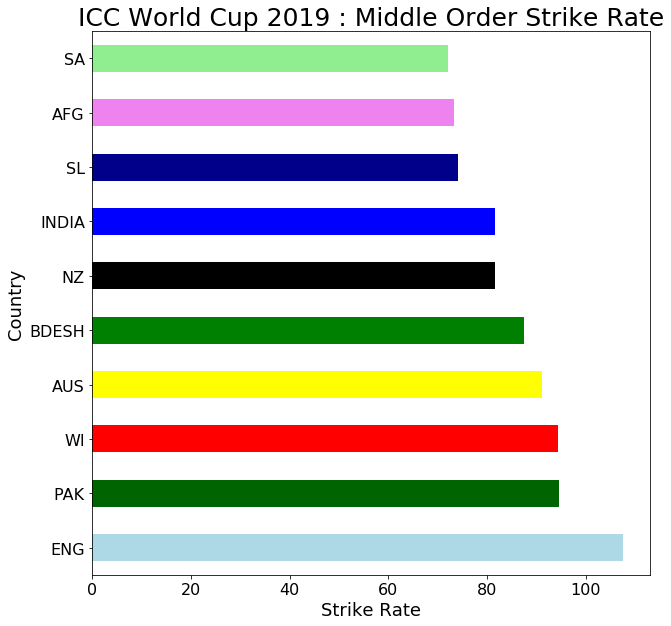

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
a = batting_position_data[batting_position_data['position'] == '4 to 7'].groupby(['Country'])['SR'].mean()
a = a.sort_values(ascending=False)
print(a)
my_colors = ['lightblue', 'darkgreen' ,'red','yellow', 'green', 'black', 'blue','darkblue','violet', 'lightgreen']
a.plot.barh(colors = my_colors)
plt.title('ICC World Cup 2019 : Middle Order Strike Rate',fontsize=25)
plt.xlabel('Strike Rate',fontsize=18)
plt.ylabel('Country',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
#plt.grid()

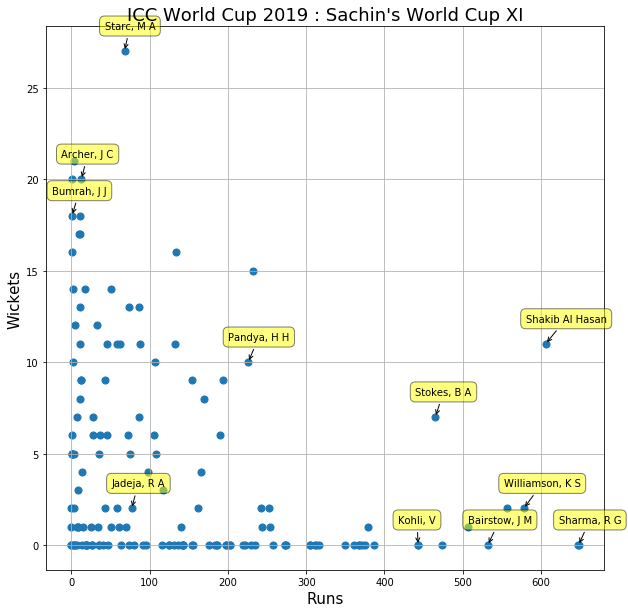

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.grid()
#plt.figure(figsize=(8,8))
#plt.style.use('ggplot')
plt.scatter(x = 'Runs', y = 'W', data = all_data,s=50, marker = 'o')
sachin_xi = all_data[
                                (all_data['Player'].str.contains('Sharma'))| 
                                (all_data['Player'].str.contains('Bairstow'))|
                                (all_data['Player'].str.contains('Williamson'))|
                                (all_data['Player'].str.contains('Kohli'))|
                                (all_data['Player'].str.contains('Shakib'))|
                                (all_data['Player'].str.contains('Stokes'))| 
                                (all_data['Player'].str.contains('Pandya'))|
                                (all_data['Player'].str.contains('Jadeja'))|
                                (all_data['Player'].str.contains('Starc'))|
                                (all_data['Player'].str.contains('Archer'))|
                                (all_data['Player'].str.contains('Bumrah'))]


plt.title("ICC World Cup 2019 : Sachin's World Cup XI", fontsize = 18)
plt.xlabel('Runs', fontsize = 15)
plt.ylabel('Wickets', fontsize = 15)
for label, x, y in zip(sachin_xi['Player'], sachin_xi['Runs'], sachin_xi['W']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset pixels', ha='left', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))